In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [14]:
comp=pd.read_csv("E:/Ravi_ExcelR_Assignments/DecisionTree/Company_Data.csv")
comp 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [15]:
comp.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [16]:
sales_mean=comp.Sales.mean()
sales_mean

7.496325

In [17]:
label_encoder = preprocessing.LabelEncoder()
comp['Sales']= label_encoder.fit_transform(comp['Sales']>=sales_mean) 

In [18]:
#filling categorical variable with dummy values
comp=pd.get_dummies(comp,columns=['ShelveLoc','Urban','US']) 
comp 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,0,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
5,1,124,113,13,501,72,78,16,1,0,0,1,0,0,1
6,0,115,105,0,45,108,71,15,0,0,1,0,1,1,0
7,1,136,81,15,425,120,67,10,0,1,0,0,1,0,1
8,0,132,110,0,108,124,76,10,0,0,1,1,0,1,0
9,0,132,113,0,131,124,76,17,0,0,1,1,0,0,1


In [19]:
x=comp.iloc[:,1:]
y=comp['Sales']

In [20]:
x
pd.set_option("display.max_rows", None) 

In [21]:
x 

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
5,124,113,13,501,72,78,16,1,0,0,1,0,0,1
6,115,105,0,45,108,71,15,0,0,1,0,1,1,0
7,136,81,15,425,120,67,10,0,1,0,0,1,0,1
8,132,110,0,108,124,76,10,0,0,1,1,0,1,0
9,132,113,0,131,124,76,17,0,0,1,1,0,0,1


In [22]:
y
pd.set_option("display.max_rows", None) 

In [23]:
y 

0      1
1      1
2      1
3      0
4      0
5      1
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     0
23     0
24     1
25     1
26     1
27     0
28     0
29     1
30     1
31     1
32     0
33     1
34     0
35     1
36     1
37     0
38     0
39     0
40     0
41     1
42     1
43     0
44     0
45     0
46     1
47     0
48     0
49     1
50     0
51     0
52     1
53     0
54     0
55     0
56     1
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     0
66     1
67     1
68     1
69     1
70     1
71     0
72     0
73     1
74     0
75     1
76     1
77     1
78     0
79     1
80     1
81     1
82     1
83     0
84     0
85     1
86     1
87     1
88     0
89     1
90     0
91     0
92     0
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    1
108    0
109    1
110    1
1

In [24]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

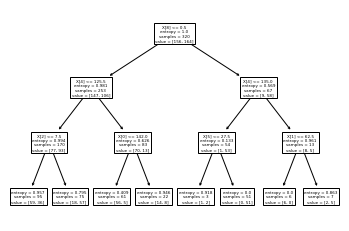

In [26]:
#PLot the decision tree
tree.plot_tree(model);

In [35]:
#in order to find feature names cn should be imn categorical form

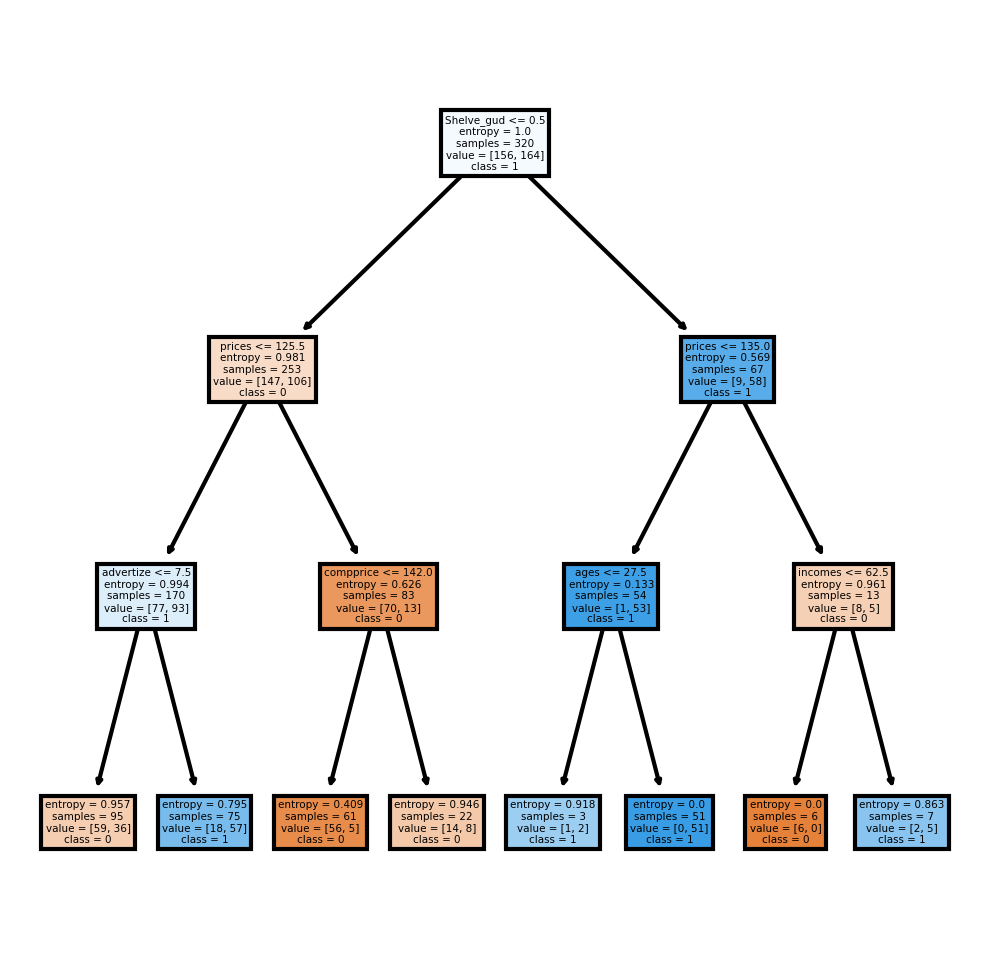

In [27]:
fn=['compprice','incomes','advertize','pop','prices','ages','edu','Shelve_Bad','Shelve_gud','Shelve_med','Ur_No','Ur_yes','us_n','us_y']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
              feature_names = fn, 
               class_names=cn,
               filled = True); 

In [28]:
model.feature_importances_ 

array([0.05416858, 0.05625587, 0.15986292, 0.        , 0.39882039,
       0.03860591, 0.        , 0.        , 0.29228633, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [29]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

prices        0.398820
Shelve_gud    0.292286
advertize     0.159863
incomes       0.056256
compprice     0.054169
ages          0.038606
us_y          0.000000
us_n          0.000000
Ur_yes        0.000000
Ur_No         0.000000
Shelve_med    0.000000
Shelve_Bad    0.000000
edu           0.000000
pop           0.000000
dtype: float64

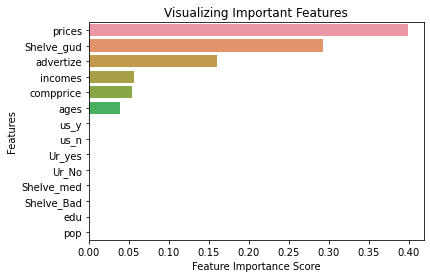

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [31]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    51
1    29
dtype: int64

In [33]:
preds

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [34]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,36,9
1,15,20


In [35]:
# Accuracy 
np.mean(preds==y_test)

0.7

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [37]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [38]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7